# Fraud Detection Overview

Fraud detection is one of the most important applications in data science, as the ability to detect fraud helps establish consumer trust and corporate integrity. Not to mention, eliminating fraud would prevent millions, if not billions, of dollars worth of loss and damages.

Depending on the data, running classification algorithms like logistic regression and SVM to detect fraud is relatively uncomplicated. There are the usual steps of collecting the data, cleaning it, and then running it through multiple models to obtain the best metric. To save time, automated machine learning programs can iterate through many machine learning and deep learning models to find the one that provides the best performance. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are over 280000 entries of data and going through all of that would be very computationally expensive, so lets just take a small sample as the train and test set. 

In [ ]:
#Save the first 50000 entries as training data
df[0:50000].to_csv('train.csv')

In [3]:
train = pd.read_csv('train.csv')
train.shape

(50000, 32)

In [ ]:
#save the next 10000 as test data
df[50000:60000].to_csv('test.csv')


In [4]:
test = pd.read_csv('test.csv')
print(test.shape)

(10000, 32)


## Quick Glance w/ info(), isna()sum(), and describe()

In [5]:
#provides overview of data types to see if any categorical data needs to be encoded; none here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#overview if any null values are present; none here
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#a good way to find placeholder nulls in numerical data. Usually this means looking at the min/max of each feature for any
#extremes; data doesn't seem to contain placeholder nulls or outliers
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<BarContainer object of 2 artists>

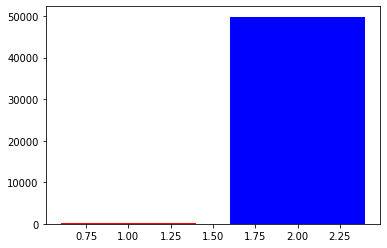

In [8]:
import matplotlib.pyplot as plt

no_fraud = train[train['Class']==0].shape[0]
fraud = train[train['Class']==1].shape[0]

plt.bar(x=[1,2], height = [fraud, no_fraud], color = ['red', 'blue'])

There's a great imbalance between fraudulent and non-fraudulent cases, which will affect our algorithms. Therefore, it's necessary to balance these classes. 

## Balancing Classes with SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = train.loc[:, train.columns != 'Class']
y = train['Class']

os = SMOTE(random_state=117)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

columns = X_train.columns

os_data_X, os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])

In [10]:
# Check the numbers
print("length of oversampled data is ",len(os_data_X))
print("Number of not fraud in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of fraud",len(os_data_y[os_data_y['Class']==1]))
print("Proportion of not fraud in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  79758
Number of not fraud in oversampled data 39879
Number of fraud 39879
Proportion of not fraud in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [11]:
os_train = os_data_X
os_train['Class'] = os_data_y.values
os_train.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,23573,32828.0,0.601467,-0.972097,-0.836823,0.285860,-0.246023,-0.971890,1.018488,-0.529431,...,0.168925,-0.323254,-0.505600,0.017159,0.509378,1.056221,-0.181210,0.056364,399.00,0
1,46656,42873.0,-0.992590,-0.329359,2.326593,-0.695860,0.032342,0.340383,0.056838,0.196443,...,-0.141609,-0.103302,-0.134270,-0.417595,0.304661,-0.375699,-0.108228,-0.153287,65.00,0
2,6358,7577.0,-0.318075,1.062283,1.759506,1.003932,0.426871,0.449983,0.604184,-0.124242,...,-0.199046,-0.065634,-0.163249,-0.574275,-0.229511,-0.414992,0.214577,-0.031305,36.00,0
3,13801,24468.0,-9.970943,-4.156007,0.059100,2.745572,2.812815,-1.567950,1.336645,-2.428785,...,-3.340266,1.091950,3.545291,0.601934,1.824614,0.045613,2.200767,-1.341030,18.14,0
4,15669,27089.0,-0.413949,1.112684,1.586218,-0.041054,0.026548,-0.881305,0.757186,-0.118384,...,-0.217986,-0.518803,-0.036909,0.386680,-0.162144,0.068418,0.271848,0.122978,0.89,0


<BarContainer object of 2 artists>

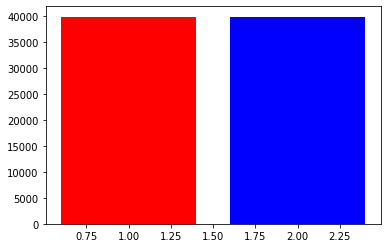

In [12]:
no_fraud = os_train[os_train['Class']==0].shape[0]
fraud = os_train[os_train['Class']==1].shape[0]

plt.bar(x=[1,2], height = [fraud, no_fraud], color = ['red', 'blue'])

In [13]:
import h2o
from h2o.automl import H2OAutoML

def run_h2o(df,target,model_number):
    
    """
    Function initiates an h2o cluster, converts
    the dataframe to an h2o dataframe, and then runs
    the autoML function to generate a list of optimal 
    predictor models, which are displayed on a scoreboard
    
    Arguments:
        dataframe: Pandas dataframe. 
        target: String. Name of the predicted target
        model_number: Int. Total number of models to run.
        
    Outputs:
        prints Leader board of best performing models in the console
        returns aml model
    """
    
    h2o.init()

    dataframe = h2o.H2OFrame(df)
    
    dataframe[target] = dataframe[target].asfactor()
    
    #Declare the x- and y- variables for the database. 
    #x-variables are predictor variables, and y-variable is what
    #we wish to predict
    x = dataframe.columns
    y = target
    
    x.remove(y)

    #Pull the training and test data out at a 80/20 split.
    train, test, val = dataframe.split_frame(ratios=[.8, .1])
    
    # Run AutoML for 20 base models (limited to 1 hour max runtime by default)
    aml = H2OAutoML(max_models=model_number, seed=117)
    aml.train(x=x, y=y, training_frame=train, validation_frame = val, )

    # View the AutoML Leaderboard
    lb = aml.leaderboard
    print(lb.head(rows=lb.nrows))
    
    return aml

In [14]:
h2o_aml = run_h2o(os_train, 'Class', 10)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 hours 15 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_Thien_Nguyen_p6krij
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.753 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
23:43:47.345: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
23:43:47.346: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_20200507_234347,0.999999,0.00176146,0.999999,7.84704e-05,0.0139916,0.000195764
DRF_1_AutoML_20200507_234347,0.999999,0.00175043,0.999999,6.27431e-05,0.0139521,0.000194662
GBM_3_AutoML_20200507_234347,0.999998,0.000636812,0.999998,6.27431e-05,0.0101333,0.000102683
GBM_1_AutoML_20200507_234347,0.999996,0.00077072,0.999996,7.84289e-05,0.0109289,0.000119441
GBM_5_AutoML_20200507_234347,0.999996,0.000663112,0.999996,7.84289e-05,0.00988867,9.77858e-05
GBM_grid__1_AutoML_20200507_234347_model_1,0.999993,0.000758535,0.999992,7.84704e-05,0.0107441,0.000115436
GBM_4_AutoML_20200507_234347,0.999992,0.000755638,0.999991,0.000109842,0.0108695,0.000118146
GBM_2_AutoML_20200507_234347,0.999991,0.000658765,0.99999,9.41147e-05,0.0101355,0.000102728
StackedEnsemble_BestOfFamily_AutoML_20200507_234347,0.999988,0.00105332,0.999987,7.84704e-05,0.0110168,0.000121369
StackedEnsemble_AllModels_AutoML_20200507_234347,0.999941,0.000963301,0.999909,9.41561e-05,0.0106037,0.000112439


In [22]:
h2o_aml.leader

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_20200507_234347


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,44.0,44.0,73997.0,13.0,20.0,17.181818,90.0,171.0,129.02272




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.000187890077012605
RMSE: 0.01370730013578914
LogLoss: 0.0014252263450890699
Mean Per-Class Error: 4.7057347220436085e-05
AUC: 0.9999996664699009
AUCPR: 0.9999996647355601
Gini: 0.9999993329398018

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6842105263157895: 


,,0,1,Error,Rate
0,0,31873.0,3.0,0.0001,(3.0/31876.0)
1,1,0.0,31792.0,0.0,(0.0/31792.0)
2,Total,31873.0,31795.0,0.0,(3.0/63668.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.684211,0.999953,42.0
1,max f2,0.684211,0.999981,42.0
2,max f0point5,0.684211,0.999925,42.0
3,max accuracy,0.684211,0.999953,42.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.684211,1.000000,42.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.684211,0.999906,42.0
8,max min_per_class_accuracy,0.705882,0.999906,40.0
9,max mean_per_class_accuracy,0.684211,0.999953,42.0



Gains/Lift Table: Avg response rate: 49.93 %, avg score: 50.01 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.496073,1.000000,2.002642,2.002642,1.000000,1.000000,1.000000,1.000000,0.993457,0.993457,100.264217,100.264217
1,,2,0.500016,0.181818,1.659560,1.999937,0.828685,0.814583,0.998649,0.998538,0.006543,1.000000,65.956005,99.993718
2,,3,1.000000,0.000000,0.000000,1.000000,0.000000,0.001539,0.499340,0.500054,0.000000,1.000000,-100.000000,0.000000




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 7.411816619016537e-05
RMSE: 0.008609190797639775
LogLoss: 0.0010901227107548265
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8863636363636364: 


,,0,1,Error,Rate
0,0,4039.0,0.0,0.0,(0.0/4039.0)
1,1,0.0,4052.0,0.0,(0.0/4052.0)
2,Total,4039.0,4052.0,0.0,(0.0/8091.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.886364,1.000000,4.0
1,max f2,0.886364,1.000000,4.0
2,max f0point5,0.886364,1.000000,4.0
3,max accuracy,0.886364,1.000000,4.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.886364,1.000000,4.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.886364,1.000000,4.0
8,max min_per_class_accuracy,0.886364,1.000000,4.0
9,max mean_per_class_accuracy,0.886364,1.000000,4.0



Gains/Lift Table: Avg response rate: 50.08 %, avg score: 50.14 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.493388,1.000000,1.996792,1.996792,1.000000,1.000000,1.000000,1.000000,0.985192,0.985192,99.679171,99.679171
1,,2,0.500062,0.954545,1.996792,1.996792,1.000000,0.973064,1.000000,0.999640,0.013327,0.998519,99.679171,99.679171
2,,3,1.000000,0.000000,0.002962,1.000000,0.001483,0.002995,0.500803,0.501379,0.001481,1.000000,-99.703813,0.000000




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.00019576398925267533
RMSE: 0.013991568505806464
LogLoss: 0.0017614589817558615
Mean Per-Class Error: 7.847035660257795e-05
AUC: 0.999999326032374
AUCPR: 0.9999993215309855
Gini: 0.9999986520647479

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.777922077689852: 


,,0,1,Error,Rate
0,0,31872.0,4.0,0.0001,(4.0/31876.0)
1,1,1.0,31791.0,0.0,(1.0/31792.0)
2,Total,31873.0,31795.0,0.0001,(5.0/63668.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.777922,0.999921,51.0
1,max f2,0.700000,0.999962,54.0
2,max f0point5,0.777922,0.999893,51.0
3,max accuracy,0.777922,0.999921,51.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.700000,1.000000,54.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.777922,0.999843,51.0
8,max min_per_class_accuracy,0.840000,0.999875,49.0
9,max mean_per_class_accuracy,0.777922,0.999922,51.0



Gains/Lift Table: Avg response rate: 49.93 %, avg score: 50.02 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.487152,1.00,2.002642,2.002642,1.000000,1.000000,1.000000,1.000000,0.975591,0.975591,100.264217,100.264217
1,,2,0.500016,0.16,1.897497,1.999937,0.947497,0.941231,0.998649,0.998488,0.024409,1.000000,89.749735,99.993718
2,,3,1.000000,0.00,0.000000,1.000000,0.000000,0.001921,0.499340,0.500220,0.000000,1.000000,-100.000000,0.000000




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.99992144,9.6179116E-5,1.0,0.99992144,0.9997644,1.0,0.99992144
1,auc,0.9999994,7.992636E-7,1.0,0.9999984,0.99999875,1.0,1.0
2,aucpr,0.9999994,8.053523E-7,1.0,0.99999833,0.99999875,1.0,1.0
3,err,7.853116E-5,9.6179116E-5,0.0,7.852992E-5,2.3558976E-4,0.0,7.853609E-5
4,err_count,1.0,1.2247449,0.0,1.0,3.0,0.0,1.0
5,f0point5,0.9998741,1.5416747E-4,1.0,0.9998742,0.99962234,1.0,0.9998741
6,f1,0.9999213,9.636831E-5,1.0,0.9999214,0.99976397,1.0,0.9999213
7,f2,0.9999685,3.855279E-5,1.0,0.9999685,0.9999056,1.0,0.9999685
8,lift_top_group,2.0026436,0.0019313621,1.999372,2.002831,2.0044074,2.0029888,2.0036192
9,logloss,0.0017614525,2.756943E-4,0.0016661928,0.0018903146,0.0021395716,0.0017146802,0.0013965034



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-07 23:50:40,13.380 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-05-07 23:50:41,13.629 sec,5.0,0.027651,0.016025,0.999564,0.999178,2.001039,0.000679,0.014580,0.001092,1.0,1.0,1.996792,0.0
2,,2020-05-07 23:50:41,13.848 sec,10.0,0.021023,0.004113,0.999921,0.999841,2.002324,0.000159,0.012578,0.001155,1.0,1.0,1.996792,0.0
3,,2020-05-07 23:50:41,14.095 sec,15.0,0.018665,0.002024,0.999984,0.999968,2.002579,0.000126,0.011093,0.001158,1.0,1.0,1.996792,0.0
4,,2020-05-07 23:50:41,14.352 sec,20.0,0.017230,0.002025,0.999984,0.999968,2.002579,0.000110,0.009850,0.001106,1.0,1.0,1.996792,0.0
5,,2020-05-07 23:50:42,14.630 sec,25.0,0.015961,0.001984,0.999984,0.999968,2.002579,0.000063,0.010209,0.001135,1.0,1.0,1.996792,0.0
6,,2020-05-07 23:50:42,14.881 sec,30.0,0.015280,0.001981,0.999984,0.999968,2.002579,0.000047,0.009692,0.001183,1.0,1.0,1.996792,0.0
7,,2020-05-07 23:50:42,15.126 sec,35.0,0.014852,0.001961,0.999984,0.999968,2.002579,0.000047,0.009228,0.001144,1.0,1.0,1.996792,0.0
8,,2020-05-07 23:50:42,15.363 sec,40.0,0.014046,0.001432,1.000000,1.000000,2.002642,0.000047,0.008929,0.001109,1.0,1.0,1.996792,0.0
9,,2020-05-07 23:50:43,15.568 sec,44.0,0.013707,0.001425,1.000000,1.000000,2.002642,0.000047,0.008609,0.001090,1.0,1.0,1.996792,0.0



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V14,124071.765625,1.000000,0.195028
1,V10,123425.195312,0.994789,0.194011
2,V11,72242.843750,0.582267,0.113558
3,V12,53370.164062,0.430156,0.083892
4,V4,48198.914062,0.388476,0.075764
5,V3,35142.882812,0.283246,0.055241
6,V2,25667.101562,0.206873,0.040346
7,V7,23318.376953,0.187943,0.036654
8,V17,22072.044922,0.177897,0.034695
9,V27,21703.255859,0.174925,0.034115



See the whole table with table.as_data_frame()


In [28]:
 #Get performance on test data
test_h2o = h2o.H2OFrame(test)
h2o_aml.leader.model_performance(test_data=test_h2o)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0008434659090909114
RMSE: 0.029042484554371573
LogLoss: 0.025701014101877195
Mean Per-Class Error: 0.2333333333333334
AUC: 0.7579969954932398
AUCPR: 0.534899072730324
Gini: 0.5159939909864797

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8863636363636364: 


,,0,1,Error,Rate
0,0,9985.0,0.0,0.0,(0.0/9985.0)
1,1,7.0,8.0,0.4667,(7.0/15.0)
2,Total,9992.0,8.0,0.0007,(7.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.886364,0.695652,3.0
1,max f2,0.886364,0.588235,3.0
2,max f0point5,0.886364,0.851064,3.0
3,max accuracy,0.886364,0.999300,3.0
4,max precision,0.977273,1.000000,0.0
5,max recall,0.000000,1.000000,16.0
6,max specificity,0.977273,1.000000,0.0
7,max absolute_mcc,0.886364,0.730041,3.0
8,max min_per_class_accuracy,0.886364,0.533333,3.0
9,max mean_per_class_accuracy,0.886364,0.766667,3.0



Gains/Lift Table: Avg response rate:  0.15 %, avg score:  0.21 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.0100,0.034205,53.333333,53.333333,0.080000,0.147727,0.080000,0.147727,0.533333,0.533333,5233.333333,5233.333333
1,,2,0.0378,0.022727,0.000000,14.109347,0.000000,0.022768,0.021164,0.055826,0.000000,0.533333,-100.000000,1310.934744
2,,3,1.0000,0.000000,0.485000,1.000000,0.000727,0.000001,0.001500,0.002111,0.466667,1.000000,-51.500035,0.000000


Precision 100
accuracy close to 100
recall bad